test


(6.5, 6)

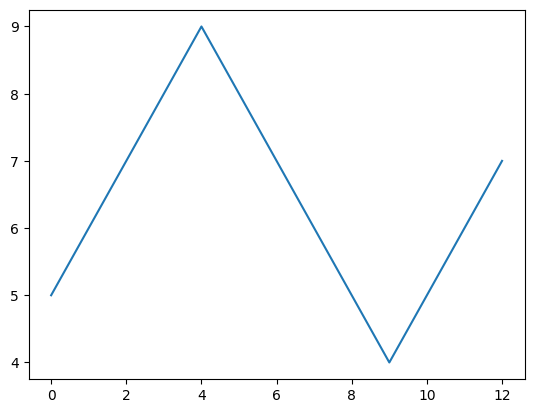

test


(6.5, 6)

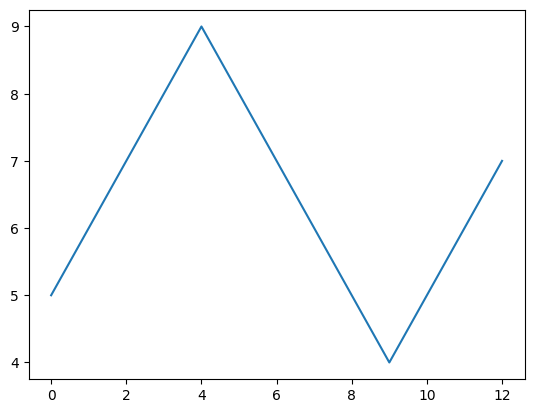

test


(6.5, 6)

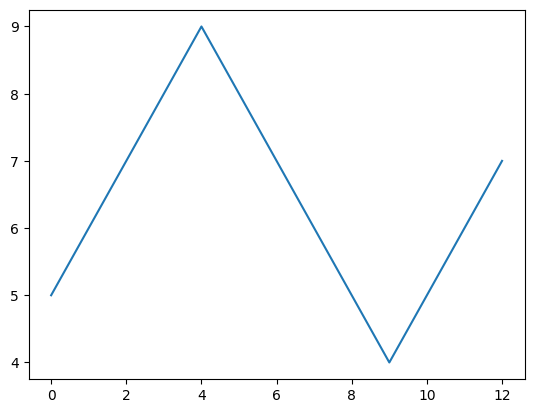

In [3]:
import matplotlib.pyplot as plt

print("test")

def findMiddleCrossing(indexPeak1, indexPeak2, ydata):
    extremum1 = ydata[indexPeak1]; extremum2 = ydata[indexPeak2]
    mCrossVal = (extremum1 + extremum2) /2
    closest_value = min(ydata[indexPeak1:indexPeak2], key=lambda x: abs(mCrossVal - x))
    mCrossIndex = ydata[indexPeak1:indexPeak2].index(closest_value) + indexPeak1
    return mCrossVal, mCrossIndex


ydata = [5,6,7,8,9,8,7,6,5,4,5,6,7]
xdata = range(0,len(ydata))
plt.plot(xdata, ydata)
findMiddleCrossing(5, 10, ydata)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt


#Force = lambda aziAngle, :

#CA_eq: contact angle as a function of aziumthal angle. Ca: local normal velocity
#L: ?       a: ?
CA_app = lambda aziAngle, CA_eq, Ca, L, a: CA_eq(aziAngle) + (9*Ca*np.log(L/a))

In [11]:
import cv2
import numpy as np
from line_method import click_event, coordinates_on_line
##linmethod: pointa = 1766, 1782; pointb = 1928, 1916
# Read RGB image
img = cv2.imread('I:\\2023_04_06_PLMA_HexaDecane_Basler2x_Xp1_24_s11_split____GOODHALO-DidntReachSplit\\D_analysis_v2\PROC_20230612121104\\rawslicesimage\\rawslicesimage_Basler_a2A5328-15ucBAS__40087133__20230406_131652896_0023_analyzed_.png')


#imgblack = cv2.imread('C:\\Users\\Sander PC\\PycharmProjects\\InterferometryPython\\red square.png')
imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\PycharmProjects\\InterferometryPython\\red square.png')
resizedimg = cv2.resize(img, [2400, 1500], interpolation = cv2.INTER_AREA)
squareSize = 10
resizedImagBlack = cv2.resize(imgblack, [squareSize, squareSize], interpolation = cv2.INTER_AREA)

pixellocationLarge = 2250
pixellocationLarge2 = 2950

#x_offset = 468
#y_offset = 114

a = 0.827846
b = -183.776
limits = [466, 1937, 112, 1385]     #xmin xmin ymin ymax
coordinates, l = coordinates_on_line(a, b, limits)      #INCORRECT VGM. ZELF BEREKEND=1852
print(f"Length of line is {l}. (Image in plot)")

x_coords = [1766, 1928]
y_coords = [1782, 1916]
aL = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])
bL = y_coords[0] - a * x_coords[0]
print(f"(Large plot). a ={aL}, b = {bL}")
limitsL = [0, 5328, 0, 4608]
coordinatesLarge, lLarge = coordinates_on_line(aL, bL, limitsL)
print(f"Length of line is {lLarge}. (Large plot)")

ratioLines = lLarge / 1852
pixelLocNew = pixellocationLarge / ratioLines
print(f"ratioLines = {ratioLines}, pixelLocLarge = {pixellocationLarge}, pixelLocNew = {pixelLocNew}")
#pixely = round(a*(pixelLocNew+466) + b)

#x_offset = round(pixelLocNew)  + 466
#y_offset = pixely

c = pixelLocNew     #c = length of line (schuine zijde)
#x_offset = round((-a*b + np.sqrt(c**2 + a**2 * c**2 - b**2)) / (1+a**2))
x_offset = round(c / (np.sqrt(1+a**2)) + 466 - squareSize/2)            #-squareSize/2 to centre it
pixely = round(a*(x_offset) + b)
y_offset = pixely
print(f"pixelLocNew={pixelLocNew} x={x_offset}, y = {y_offset}")

resizedimg[y_offset:y_offset+resizedImagBlack.shape[0], x_offset:x_offset+resizedImagBlack.shape[1]] = resizedImagBlack
cv2.imshow('image', resizedimg)
right_clicks = []
def click_event(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
        right_clicks.append([x, y])
    if len(right_clicks) == 2:
        cv2.destroyAllWindows()

cv2.setMouseCallback('image', click_event)
cv2.waitKey(0)

P1 = np.array(right_clicks[0])
P2 = np.array(right_clicks[1])
print(f"Selected coordinates: {P1=}, {P2=}.")
print(f"Selected coordinates: P1 = [{P1[0]:.0f}, {P1[1]:.0f}], P2 = [{P2[0]:.0f}, {P2[1]:.0f}]")

cv2.destroyAllWindows()


Length of line is 2172.0. (Image in plot)
(Large plot). a =0.8271604938271605, b = 320.023964
Length of line is 6727.57713524293. (Large plot)
ratioLines = 3.6326010449475863, pixelLocLarge = 2250, pixelLocNew = 619.39089158426
pixelLocNew=619.39089158426 x=938, y = 593
Selected coordinates: P1=array([471, 203]), P2=array([1067,  697]).
Selected coordinates: P1 = [471, 203], P2 = [1067, 697]


In [1]:
####Working for hexadecane      (pixelLocation working properly). Change P1 & P2 for other rawsliceimages
import glob
import os.path
import cv2
import numpy as np
import csv
from line_method import click_event, coordinates_on_line
""""
This part is to show dots of pixellocations for all swellingImages, without clickingevents (below; to obtain required sizes in pixels etc.).
"""
##linmethod: pointa = 1766, 1782; pointb = 1928, 1916
# Read RGB image
source = 'D:\\2023_04_06_PLMA_HexaDecane_Basler2x_Xp1_24_s11_split____GOODHALO-DidntReachSplit\\D_analysisv4\\PROC_20230724185238'
imgList = [f for f in glob.glob(os.path.join(source, f"rawslicesimage\\*.png"))]
pixellocationLarge = [0, 2250, 2550, 6707]#2170
CLICKEVENT = False
n = 0
#nAllImages = np.arange(0, len(imgList),1)
nAllImages = [0,1]
print(f"Total amount of images in folder: {len(imgList)}. \nTotal amount of images used: {len(nAllImages)}")
for imgPath in imgList:
    if n in nAllImages:
        img = cv2.imread(imgPath)
        csvList = [f for f in glob.glob(os.path.join(source, f"csv\\*unwrapped.csv"))]

        #imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\Documents\\InterferometryPython\\red square.png')
        imgblack = cv2.imread('C:\\Users\\ReuvekampSW\\PycharmProjects\\InterferometryPython\\red square.png')
        resizedimg = cv2.resize(img, [2400, 1500], interpolation = cv2.INTER_AREA)
        squareSize = 5
        resizedImagBlack = cv2.resize(imgblack, [squareSize, squareSize], interpolation = cv2.INTER_AREA)

        def calcLineEquation(x_coords, y_coords):       #For eq   y = ax +b
            aL = (y_coords[1]-y_coords[0])/(x_coords[1]-x_coords[0])    #a = dy /dx
            bL = y_coords[0] - aL * x_coords[0]                          #b = y(x) - a*x
            return aL, bL
        def calcLineLength(edge1, edge2):   #edge1(x,y)    edge2(x,y)
            return ((edge2[0] - edge1[0])**2 + (edge2[1] - edge1[1])**2 )**0.5
        def readInDataLengthLargeImage(csvList):
            with open(csvList[0]) as f:
                summation = sum(1 for line in f)
            return summation-1

        #P1 and P2 along the draw line of Image in plot.
        #INPUT EDGES OF THE LINE WITH BORDER OF IMAGE IN PLOT AS (P1 = [x,y])
        #Check this in e.g. paint.net with the cursor
        P1 = [466, 206]
        #P2 = [1091, 725]
        P2 = [1892, 1382]           #For hexadecane
        a, b = calcLineEquation([P1[0], P2[0]], [P1[1], P2[1]])
        limits = [466, 1937, 112, 1385]     #xmin xmin ymin ymax of image in plot. Should always be same
        l = calcLineLength(P1, P2)
        print(f"Image in plot: length calculated is {l} from edges")

        #x_coords = [1766, 1782]
        #y_coords = [1928, 1916]
        #aL, bL = calcLineEquation(x_coords, y_coords)
        #print(f"(Large plot). a ={aL}, b = {bL}")
        lLarge = readInDataLengthLargeImage(csvList)    #read in OG image data length of line from counting rows in csv file
        print(f"Length of data in Large image= {lLarge}")
        ratioLines = lLarge / l

        for i, pixelLocation in enumerate(pixellocationLarge):
            pixelLocNew = pixelLocation / ratioLines
            print(f"ratioLines = {ratioLines}, pixelLocLarge = {pixelLocation}, pixelLocNew = {pixelLocNew}")

            c = pixelLocNew     #c = length of line (schuine zijde)
            x_offset = round(c / (np.sqrt(1+a**2)) + 466 - squareSize/2)            #-squareSize/2 to centre it
            pixely = round(a*(x_offset) + b)
            y_offset = pixely
            print(f"pixelLocNew={pixelLocNew} x={x_offset}, y = {y_offset}")
            resizedimg[y_offset:y_offset+resizedImagBlack.shape[0], x_offset:x_offset+resizedImagBlack.shape[1]] = resizedImagBlack
            resizedimg = cv2.putText(resizedimg, f"pix: {pixelLocation}", [2000, 120+i*30], cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 4)
            if CLICKEVENT:
                cv2.imshow('image', resizedimg)
                right_clicks = []
                def click_event(event, x, y, flags, params):
                    if event == cv2.EVENT_LBUTTONDOWN:
                        right_clicks.append([x, y])
                    if len(right_clicks) == 2:
                        cv2.destroyAllWindows()

                cv2.setMouseCallback('image', click_event)
                cv2.waitKey(0)
                P1 = np.array(right_clicks[0])
                P2 = np.array(right_clicks[1])
                print(f"Selected coordinates: {P1=}, {P2=}.")
                print(f"Selected coordinates: P1 = [{P1[0]:.0f}, {P1[1]:.0f}], P2 = [{P2[0]:.0f}, {P2[1]:.0f}]")
                cv2.destroyAllWindows()
        if not os.path.exists(os.path.join(source, f"rawslicesimage\\pixelLocation")):
            os.mkdir(os.path.join(source, f"rawslicesimage\\pixelLocation"))
        cv2.imwrite(os.path.join(source, f"rawslicesimage\\pixelLocation\\rawlsiceimageWithPixelLocation{n}.png") , resizedimg)
    n = n+1


Total amount of images in folder: 0. 
Total amount of images used: 2


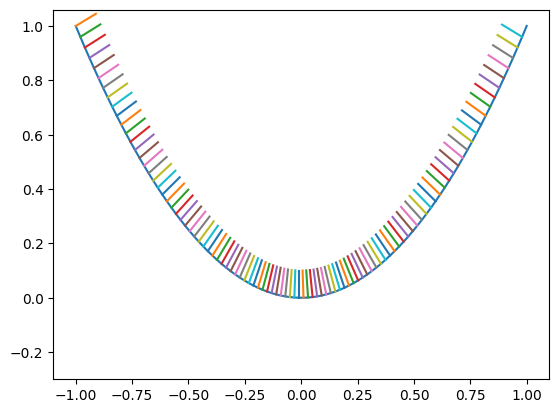

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

def get_normals(length=.1):
    for idx in range(len(x)-1):
        x0, y0, xa, ya = x[idx], y[idx], x[idx+1], y[idx+1]
        dx, dy = xa-x0, ya-y0
        norm = math.hypot(dx, dy) * 1/length
        dx /= norm
        dy /= norm

        ax.plot((x0, x0-dy), (y0, y0+dx))    # plot the normals

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [8, 8]

x = np.linspace(-1, 1, 100)
y = x**2
ax.set_ylim(-0.3, 1.06)
ax.plot(x, y)
get_normals()


plt.show()

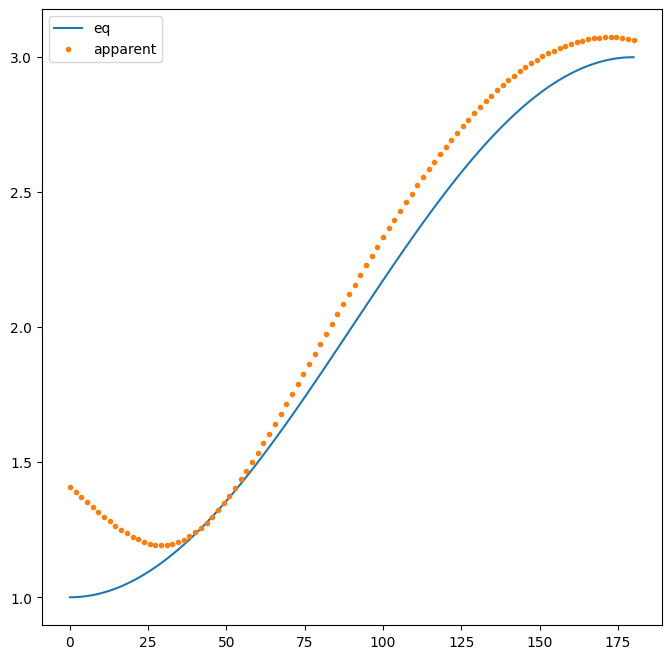

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math

angle = np.linspace(0, np.pi, 100)
theta_eq = np.sin(angle-np.pi/2) + 2
#Ca = 1E-6 * np.sin(angle-np.pi/2)
Ca = 1E-2 * np.sin(np.linspace(np.pi, 3*np.pi, 100)) + 1E-2
x = 3E-3   #capillary length, ongeveer 3mm
l = 6E-12  #slip length
theta_app = (theta_eq**3 + 9*Ca*np.log(x/l))**(1/3)
#theta_app = (theta_eq**3 + 10)**(1/3)
plt.plot(angle*180/np.pi, theta_eq, label='eq')
plt.plot(angle*180/np.pi, theta_app, '.', label = 'apparent')
plt.legend(loc='best')

#9*Ca*np.log(x/l)


5000.0
76.65473872274615


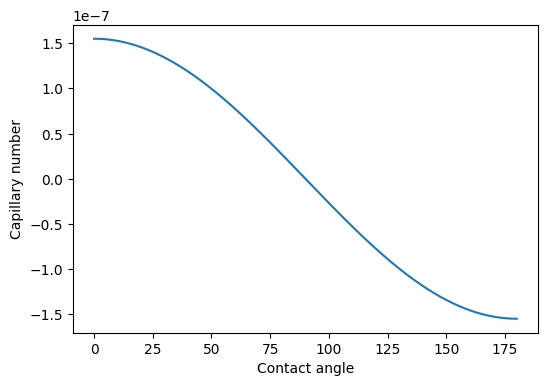

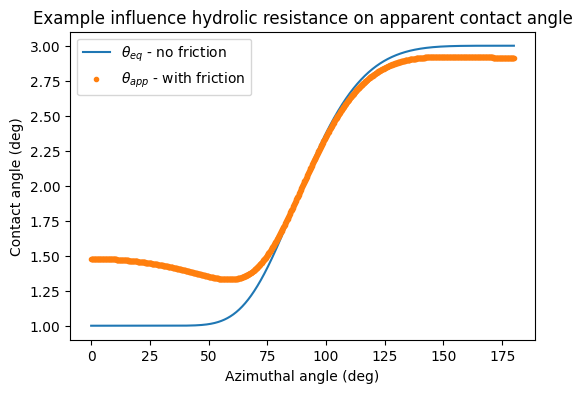

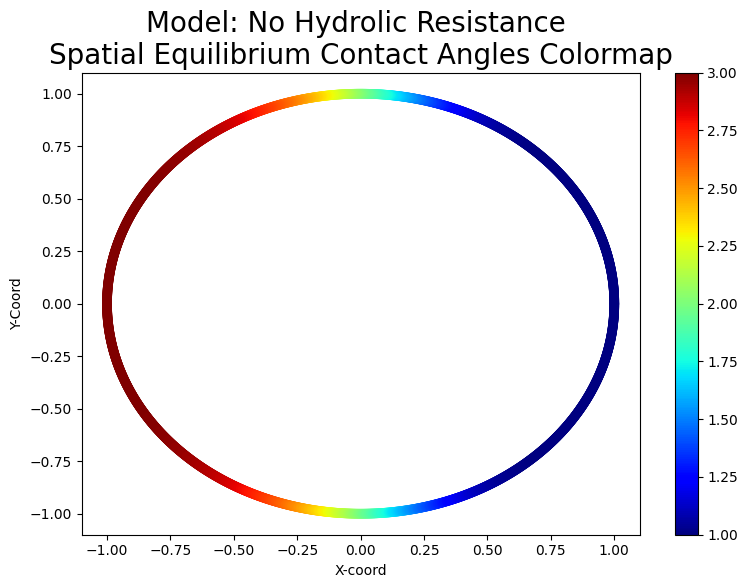

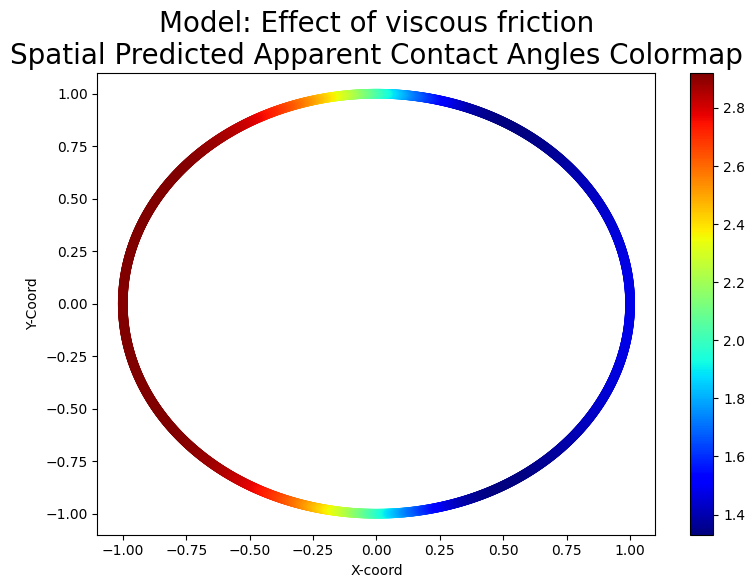

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

angle = np.linspace(0, np.pi, 1000)
#theta_eq = (np.sin(angle-np.pi/2) + 2) * np.pi / 180

Ca = -1.55E-7 * np.sin(angle-np.pi/2)  #OG standard Ca curve: normal sinus between + and - the value
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.plot(angle*180/np.pi, Ca)
ax1.set(xlabel = 'Contact angle', ylabel = 'Capillary number')

x = 100E-6   #slip length, 10 micron?                     -macroscopic
l = 2E-9       #capillary length, ongeveer              -micro/nanoscopic
for x in [10E-6]:
    anglerange = np.linspace(0,1,1000)
    k = 3
    #Ca = -1E-6 * ((((0.5+np.sin(anglerange*np.pi-np.pi/2)/2)**((2*(1-anglerange))**k)))*2 - 1)
    theta_eq = (((0.5+np.sin(anglerange*np.pi-np.pi/2)/2)**((2*(1-anglerange))**k))*2 + 1) * np.pi / 180
    prefactor = 9  #OG = 9
    theta_app = (theta_eq**3 + prefactor*Ca*np.log(x/l))**(1/3)
    print(f"{x/l}")
    print(f"{prefactor*np.log(x/l)}")
    #xOverL = 0.01
    #theta_app = (theta_eq**3 + 9*Ca*np.log(xOverL))**(1/3)
    fig1, ax1 = plt.subplots(figsize=(6,4))
    ax1.plot(angle*180/np.pi, theta_eq * 180 / np.pi, label=r'$\theta_{eq}$ - no friction')
    ax1.plot(angle*180/np.pi, theta_app * 180 / np.pi, '.', label = r'$\theta_{app}$ - with friction')
    ax1.set(xlabel='Azimuthal angle (deg)', ylabel='Contact angle (deg)', title='Example influence hydrolic resistance on apparent contact angle')
    ax1.legend(loc='best')
    fig1.savefig(f"C:\\Downloads\\CA vs azimuthal Ca={max(Ca)}, x={x}, l={l}.png", dpi=600)

    theta_eq = theta_eq * 180 / np.pi
    theta_app = theta_app * 180 / np.pi

    fig3, ax3 = plt.subplots(figsize=(9,6))
    xArrFinal = np.cos(angle)
    yArrFinal = np.sin(angle)
    im3 = ax3.scatter([xArrFinal, np.flip(xArrFinal)], [yArrFinal, -np.flip(yArrFinal)], c=[theta_eq, np.flip(theta_eq)], cmap='jet', vmin=min(theta_eq), vmax=max(theta_eq))
    ax3.set_xlabel("X-coord"); ax3.set_ylabel("Y-Coord");
    ax3.set_title(f"Model: No Hydrolic Resistance \nSpatial Equilibrium Contact Angles Colormap", fontsize = 20)
    fig3.colorbar(im3)
    fig3.savefig("C:\\Downloads\\NOhydrolic.png", dpi=600)

    fig4, ax4 = plt.subplots(figsize=(9,6))
    im4 = ax4.scatter([xArrFinal, np.flip(xArrFinal)], [yArrFinal, -np.flip(yArrFinal)], c=[theta_app, np.flip(theta_app)], cmap='jet', vmin=min(theta_app), vmax=max(theta_app))
    ax4.set_xlabel("X-coord"); ax4.set_ylabel("Y-Coord");
    ax4.set_title(f"Model: Effect of viscous friction\nSpatial Predicted Apparent Contact Angles Colormap", fontsize = 20)
    fig4.colorbar(im4)
    fig4.savefig(f"C:\\Downloads\\YEShydrolic Ca={max(Ca)}, x={x}, l={l}.png", dpi=600)



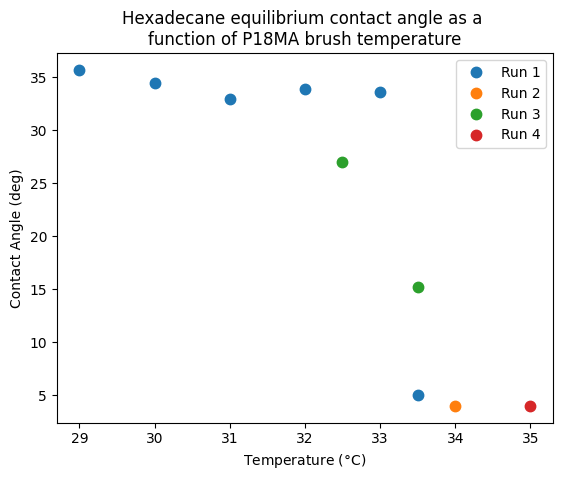

In [26]:
### Plotting for analysis of contact angle measurements. P18MA with hexadecane at various temperatures (2024/05/07).
import matplotlib.pyplot as plt
T1 = [29, 30, 31, 32, 33, 33.5]
Ca1 = [35.7, 34.5, 33.0, 33.9, 33.6, 5]
T2 = [34]
Ca2 = [4]
T3 = [32.5, 33.5]
Ca3 = [27, 15.2]
T4 = [35]
Ca4 = [4]
fig1, ax1 = plt.subplots()
msize = 15
ax1.plot(T1, Ca1, '.', label='Run 1', markersize = msize)
ax1.plot(T2, Ca2, '.', label='Run 2', markersize = msize)
ax1.plot(T3, Ca3, '.', label='Run 3', markersize = msize)
ax1.plot(T4, Ca4, '.', label='Run 4', markersize = msize)
ax1.legend(loc='best')
ax1.set(xlabel=f'Temperature ($\degree$C)', ylabel='Contact Angle (deg)', title='Hexadecane equilibrium contact angle as a \nfunction of P18MA brush temperature')
plt.show()
fig1.savefig("C:\\Downloads\\temp.png", dpi=600)

In [1]:
#Voorbeeldberekening capillary number voor gemeten contact line velocity 2024_05_07_PLMA_Basler15uc_Zeiss5x_dodecane_Xp1_31_S2_WEDGE_2coverslip_spacer_V3
U = (28.8 * 1E-6) / 60  #28.8um/min     -> Ca = 5.4E-8
#U = 0.083 * 1E-3 / 60 #uitgezoomde standaard video  mm/min  -> Ca = 1.55E-7
U = 0.013 * 1E-3 #van Yde mm/s -> Ca = 1.45E-6
eta = (3.03 * 1E-3) #viscosity hexadecane, 3.03mPa*s
gamma = 27 * 1E-3 #interfaceial tension hexadecane 27mN/m

Ca = (U*eta) / gamma
print(f"Ca = {Ca}")

Ca = 1.4588888888888885e-06


We startin
Imported pickle file
0.053330166440186844
6.283185307179586 6.283185307179586


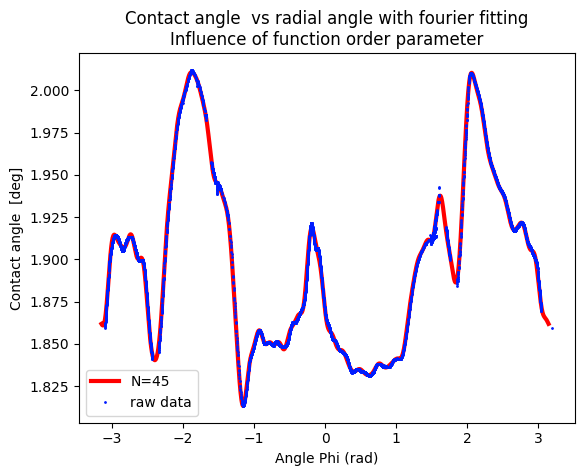

In [17]:
### Testing Dirks Fourier fit thingy when no data at -pi/pi
import scipy
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')     #configuration for printing logging messages. Can be removed safely

#######
def manualFitting(inputX, inputY, path, Ylabel, N):
    #x_shift = 0 #radial shift to make sure no gap at -pi / pi
    if abs(abs(inputX[0]) - np.pi) > 0.3:
        x_shift = inputX[len(inputX)//2]
        logging.critical("Fourier fit will likely oscillate wildly near -pi/pi. Implement function the shift entire thing in 'manualFitting(..)' ")
    else:
        print(abs(abs(inputX[0]) - np.pi))
    inputX = inputX + [np.pi + (np.pi-abs(inputX[0]))]   #add 1 value of x to the end of array at the 'positive x position' of the first x-value, for correct trapz integration
    inputY = inputY + [inputY[0]]
    print(inputX[-1] - inputX[0], 2*np.pi)
    
    #inputX =+ x_shift  #shift all x-data by the
    
    ######
    I_k__c_j = lambda f_j1, f_j, phi_j1, phi_j, k:  f_j1 * (np.sin(k*phi_j1) / k +
                                                            (np.cos(k*phi_j1) - np.cos(k*phi_j)) / (k**2 * (phi_j1 - phi_j))) - \
                                                    f_j * (np.sin(k*phi_j)/k +
                                                            (np.cos(k*phi_j1) - np.cos(k*phi_j)) / (k**2 * (phi_j1 - phi_j)))
    f_k__c = lambda I_k__c, k, phi, f_phi : (1/np.pi) * sum([I_k__c_j(f_phi[j+1], f_phi[j], phi[j+1], phi[j], k) for j in range(0, len(f_phi)-1)])

    I_k__s_j = lambda f_j1, f_j, phi_j1, phi_j, k: f_j1 * (-np.cos(k * phi_j1) / k +
                                                           (np.sin(k*phi_j1) - np.sin(k * phi_j)) /
                                                           (k**2 * (phi_j1 - phi_j))) + \
                                                   f_j * (np.cos(k * phi_j) / k -
                                                          (np.sin(k*phi_j1) - np.sin(k * phi_j)) /
                                                          (k**2 * (phi_j1 - phi_j)))

    f_k__s = lambda I_k__s, k, phi, f_phi: (1 / np.pi) * sum([I_k__s_j(f_phi[j + 1], f_phi[j], phi[j + 1], phi[j], k) for j in range(0, len(f_phi)-1)])
    ##########
    #x = 1 value for phi to calculate the corresponding y for. k = 1 number, the max order to calculate the fit with.
    #f_c & f_k = sigma's for sin & cos: array of numbers with (at least) as many numbers as the desired order k
    f_phi = lambda x, k, f_c, f_s: sum([f_c[i] * np.cos(i*x) + f_s[i] * np.sin(i*x) for i in range(0, k+1)])
    ##########
    
    # print(len(inputX))
    # inputX = inputX[:-1]
    # print(len(inputX))
    # inputY = inputY[:-1]
 
    
    sigma_k_s = [0]     #sigma_k_s=0  at n=0
    sigma_k_c = [(1 / (2*np.pi)) * scipy.integrate.trapz(inputY, inputX)]

    for k in range(1, N[-1]+1): #for all orders in range 1 to N, determine the sigma's sin & cos.
        sigma_k_s.append(f_k__s(I_k__s_j, k, inputX, inputY))
        sigma_k_c.append(f_k__c(I_k__c_j, k, inputX, inputY))
    N = np.array([0] + N)
    #X_range = np.linspace(min(inputX), max(inputX), 2000)       #500?
    X_range = np.linspace(-np.pi, np.pi, 2000)       #500?
    
    fig1, ax1 = plt.subplots()
    if len(N)>2:
        colorscheme = 'plasma'
        cmap = plt.get_cmap(colorscheme)
        colorGradient = np.linspace(0, 1, len(N))
    else:
        colorscheme = 'hsv'
        cmap = plt.get_cmap(colorscheme)
        colorGradient = [0.66, 0]

    func_range = lambda x_range: [f_phi(x, N[-1], sigma_k_c, sigma_k_s) for x in x_range]
    func_single = lambda x: f_phi(x, N[-1], sigma_k_c, sigma_k_s)

    for i, n in enumerate(N[1:]):
        Y_range = [f_phi(Xval, n, sigma_k_c, sigma_k_s) for Xval in X_range]
        ax1.plot(X_range, Y_range, '-', label=f'N={n}', linewidth=3,  color=cmap(colorGradient[i+1]))
    ax1.plot(inputX, inputY, '.', label='raw data',  color=cmap(colorGradient[0]), markersize=2)
    #TODO clean this up (messing with plot titles etc) for figure making
    #ax1.set(xlabel='Angle Phi (rad)', ylabel=f'{Ylabel[0]} {Ylabel[1]}', title=f"{Ylabel[0]} vs radial angle with fourier fitting")
    ax1.set(xlabel='Angle Phi (rad)', ylabel=f'{Ylabel[0]} {Ylabel[1]}',
            title=f"{Ylabel[0]} vs radial angle with fourier fitting\n"
                  f"Influence of function order parameter")
    ax1.legend(loc='best')
    fig1.savefig(os.path.join(path, f"{Ylabel[0]} Fourier fitted.png"), dpi=300)
    plt.show()
    return

print('We startin')
with open('tempForManualFitting.pickle', 'rb') as new_filename:
    inputX, inputY, path, Ylabel, N = pickle.load(new_filename)     # x-distance, intensity
print('Imported pickle file')
manualFitting(inputX, inputY, path, Ylabel, [45])

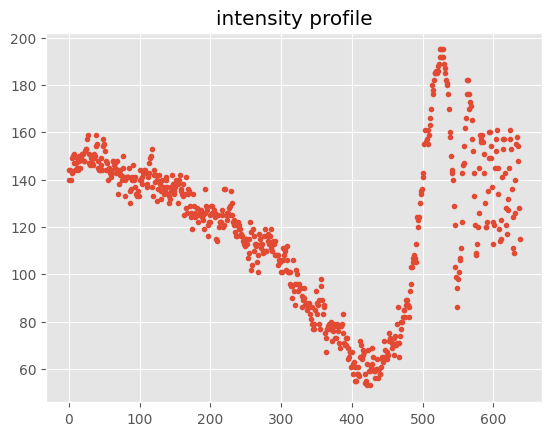

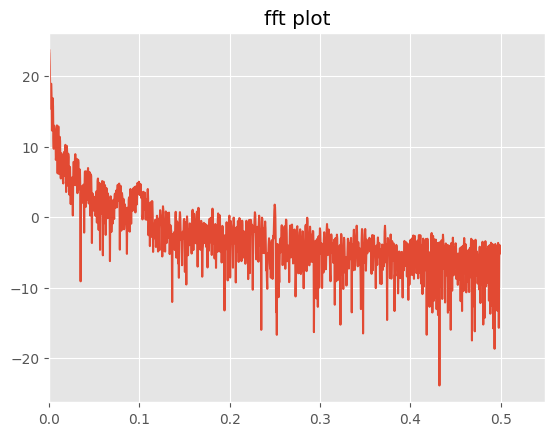

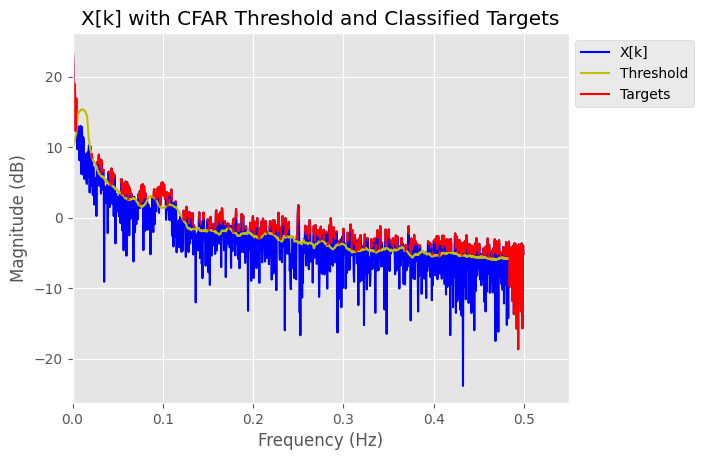

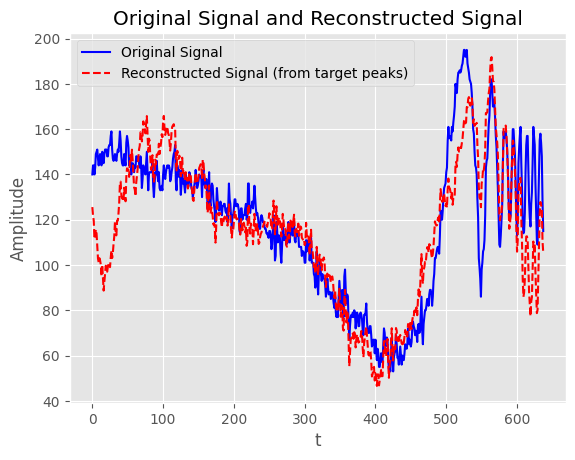

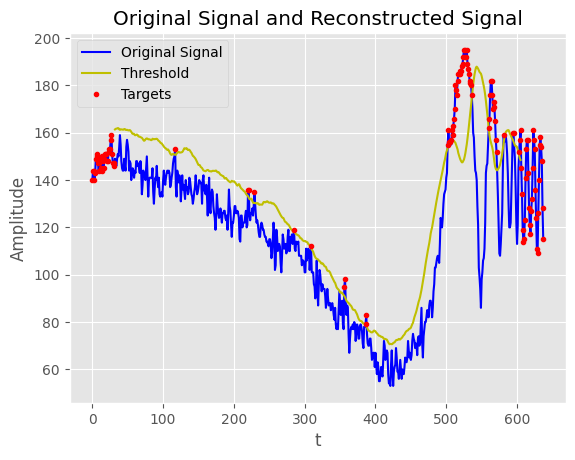

In [19]:
"""
Testing CFAR radar peak target detection:
From https://www.youtube.com/watch?v=BEg29UuZk6c & https://colab.research.google.com/drive/1Y5bCQs4AZRggZW3N7obArBCU8IYPFLHh#scrollTo=zo0OBizaJ9k7 
Main function = cfar(input_data, num_guard_cells=12, num_ref_cells=30, bias=1)
Trying w/ fourier transfer (as they do in video), and directly on intensity vs. distance data.
So far, no great success in finding good values for num_guard_cells and num_ref_cells:
also in part because interesting peaks are at edges. which 
"""
import pickle
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift, ifft, ifftshift
from scipy import signal
from scipy.constants import pi
from numpy.lib.stride_tricks import sliding_window_view
import warnings
import os

plt.style.use("ggplot")
warnings.filterwarnings("ignore")
path = 'G:\\2024_05_07_PLMA_Basler15uc_Zeiss5x_dodecane_Xp1_31_S2_WEDGE_2coverslip_spacer_V3\\Analysis CA Spatial\\pickle dumps\\Example Intensity Data.pickle'

with open(path, 'rb') as new_filename:
    t, x_n_windowed = pickle.load(new_filename)     # x-distance, intensity
    
fig2, ax2 = plt.subplots()
ax2.plot(t, x_n_windowed, '.')
ax2.set(title = 'intensity profile')

N = len(t)
fs = t[-1] / N
fft_len = N * 4 # do some FFT padding for a smoother output

X_k = fftshift(fft(x_n_windowed, fft_len))
X_k /= N / 2
X_k = np.abs(X_k)
X_k_log = 10 * np.log10(X_k)

freq = np.linspace(-fs / 2, fs / 2, fft_len)

fig1, ax1 = plt.subplots()
ax1.plot(freq, X_k_log)
ax1.set_xlim(left = 0)
ax1.set(title = 'fft plot')



def cfar(X_k, num_guard_cells, num_ref_cells, bias, cfar_method="average"):
    N = X_k.size
    cfar_values = np.zeros(X_k.shape)
    for center_index in range(
        num_guard_cells + num_ref_cells, N - (num_guard_cells + num_ref_cells)
    ):
        min_index = center_index - (num_guard_cells + num_ref_cells)
        min_guard = center_index - num_guard_cells
        max_index = center_index + (num_guard_cells + num_ref_cells) + 1
        max_guard = center_index + num_guard_cells + 1

        lower_nearby = X_k[min_index:min_guard]
        upper_nearby = X_k[max_guard:max_index]

        lower_mean = np.mean(lower_nearby)
        upper_mean = np.mean(upper_nearby)

        if cfar_method == "average":
            mean = np.mean(np.concatenate((lower_nearby, upper_nearby)))
        elif cfar_method == "greatest":
            mean = max(lower_mean, upper_mean)
        elif cfar_method == "smallest":
            mean = min(lower_mean, upper_mean)
        else:
            mean = 0

        output = mean * bias
        cfar_values[center_index] = output

    targets_only = np.copy(X_k)
    targets_only[np.where(X_k < cfar_values)] = np.ma.masked

    return cfar_values, targets_only

threshold, targets_only = cfar(X_k, num_guard_cells=12, num_ref_cells=30, bias=1)        #num_guard_cells=8, num_ref_cells=12, bias=1
fig3, ax3 = plt.subplots()
ax3.plot(freq, X_k_log, label="X[k]", c="b")
ax3.plot(freq, 10 * np.log10(np.abs(threshold)), label="Threshold", c="y")
ax3.plot(freq, 10 * np.log10(np.abs(targets_only)), label="Targets", c="r")
ax3.set_xlim(left = 0)
ax3.set(title = "X[k] with CFAR Threshold and Classified Targets", xlabel = "Frequency (Hz)", ylabel = "Magnitude (dB)" )
ax3.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

# Step 1: Identify the indices of target peaks in the frequency domain
#target_indices = np.where(~np.ma.getmask(targets_only))[0]  # Get indices of unmasked (target) values
target_indices = np.where(targets_only != 0)  # Get indices of unmasked (target) values
target_frequencies = freq[target_indices]  # Corresponding frequencies

# Step 2: Create a mask for the FFT array to isolate the target peaks
fft_masked = np.zeros_like(X_k, dtype=complex)  # Create a complex array of zeros
fft_masked[target_indices] = fftshift(fft(x_n_windowed, fft_len))[target_indices]  # Isolate target peaks

# Step 3: Perform inverse FFT to transform back to the time domain
reconstructed_signal = np.real(ifft(ifftshift(fft_masked)))  # Inverse FFT and take the real part
reconstructed_signal = reconstructed_signal[:N]  # Trim to the original signal length

# Step 4: Plot the reconstructed signal
fig4, ax4 = plt.subplots()
ax4.plot(t, x_n_windowed, label="Original Signal", c="b")
ax4.plot(t, reconstructed_signal, label="Reconstructed Signal (from target peaks)", c="r", linestyle="--")
ax4.set(title="Original Signal and Reconstructed Signal", xlabel="t", ylabel="Amplitude")
ax4.legend()
plt.show()


threshold, targets_only = cfar(np.array(x_n_windowed), num_guard_cells=12, num_ref_cells=20, bias=1.1)        #num_guard_cells=8, num_ref_cells=12, bias=1
threshold_indices = np.where(threshold != 0)
targets_indices = np.where(targets_only != 0)
fig5, ax5 = plt.subplots()
ax5.plot(t, x_n_windowed, label="Original Signal", c="b")
ax5.plot(t[threshold_indices], np.abs(threshold[threshold_indices]), label="Threshold", c="y")
ax5.plot(t[targets_indices], np.abs(targets_only[targets_indices]), '.',label="Targets", c="r")
ax5.set(title="Original Signal and Reconstructed Signal", xlabel="t", ylabel="Amplitude")
ax5.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


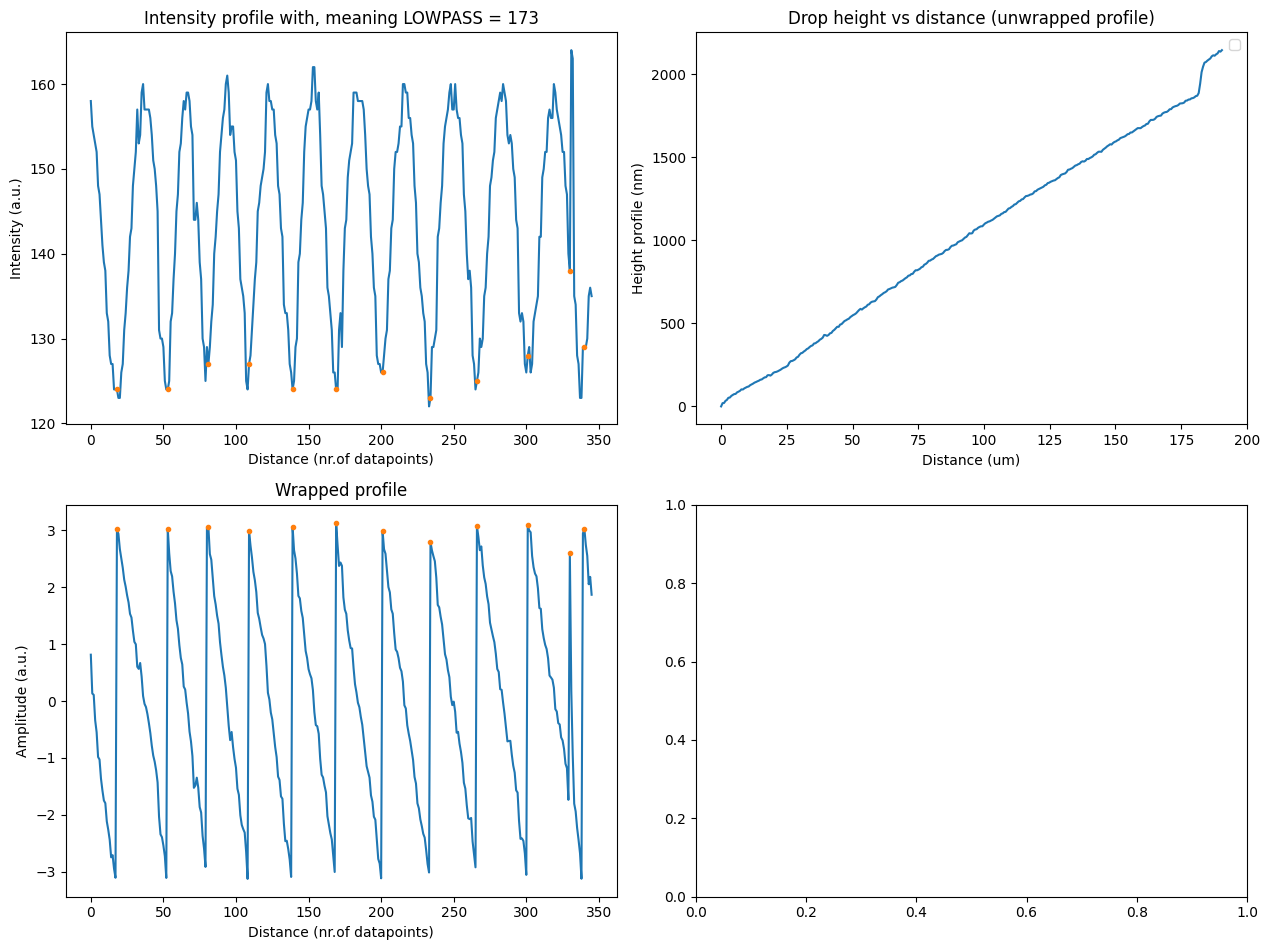

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


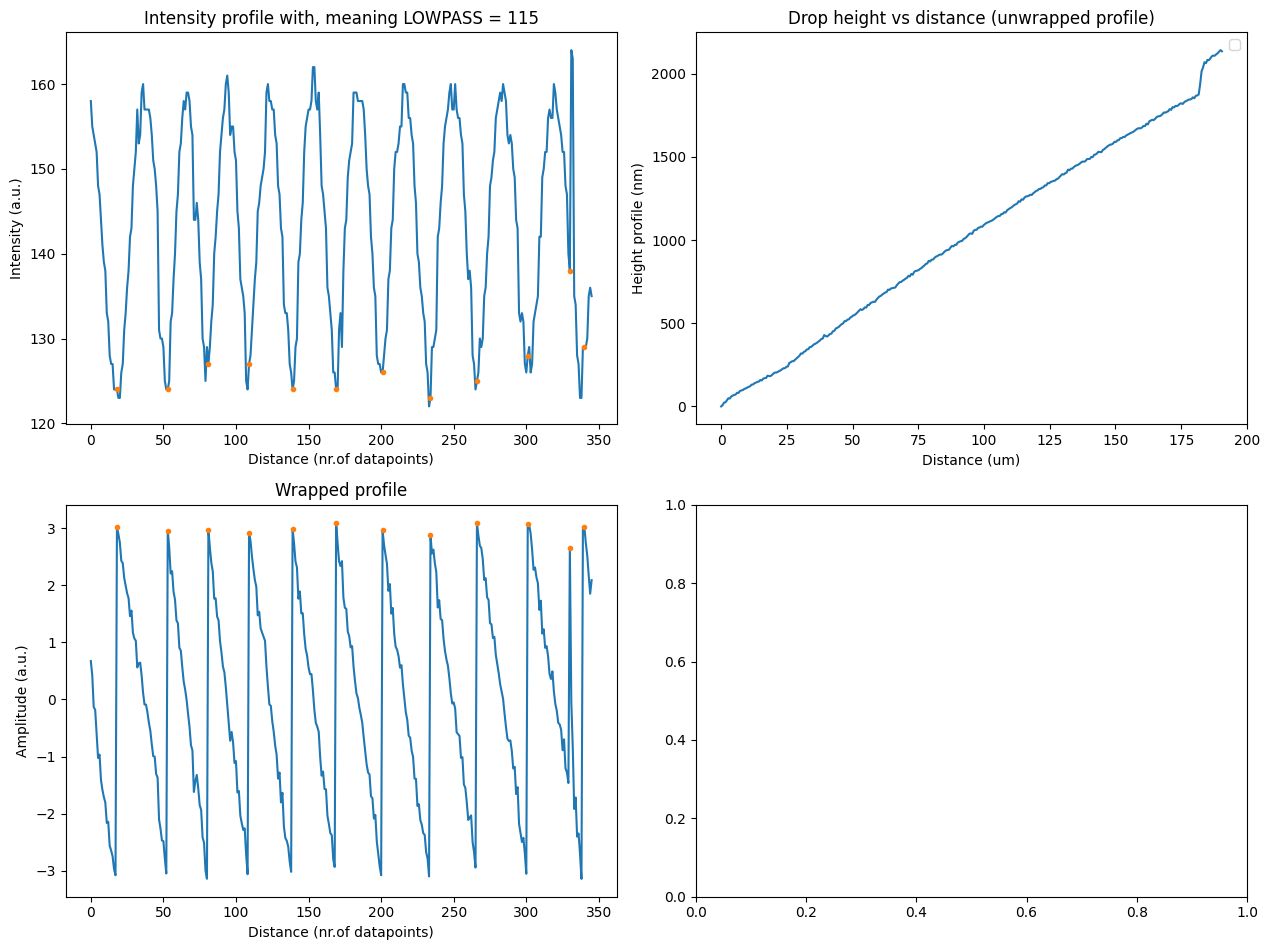

CRITICAL:root:WATCH OUT: calculated height from unwrapping (1944.55) is very different from calculated height straight from nr. of maximas (lower bound=1994.42, upper bound = 2357.04)


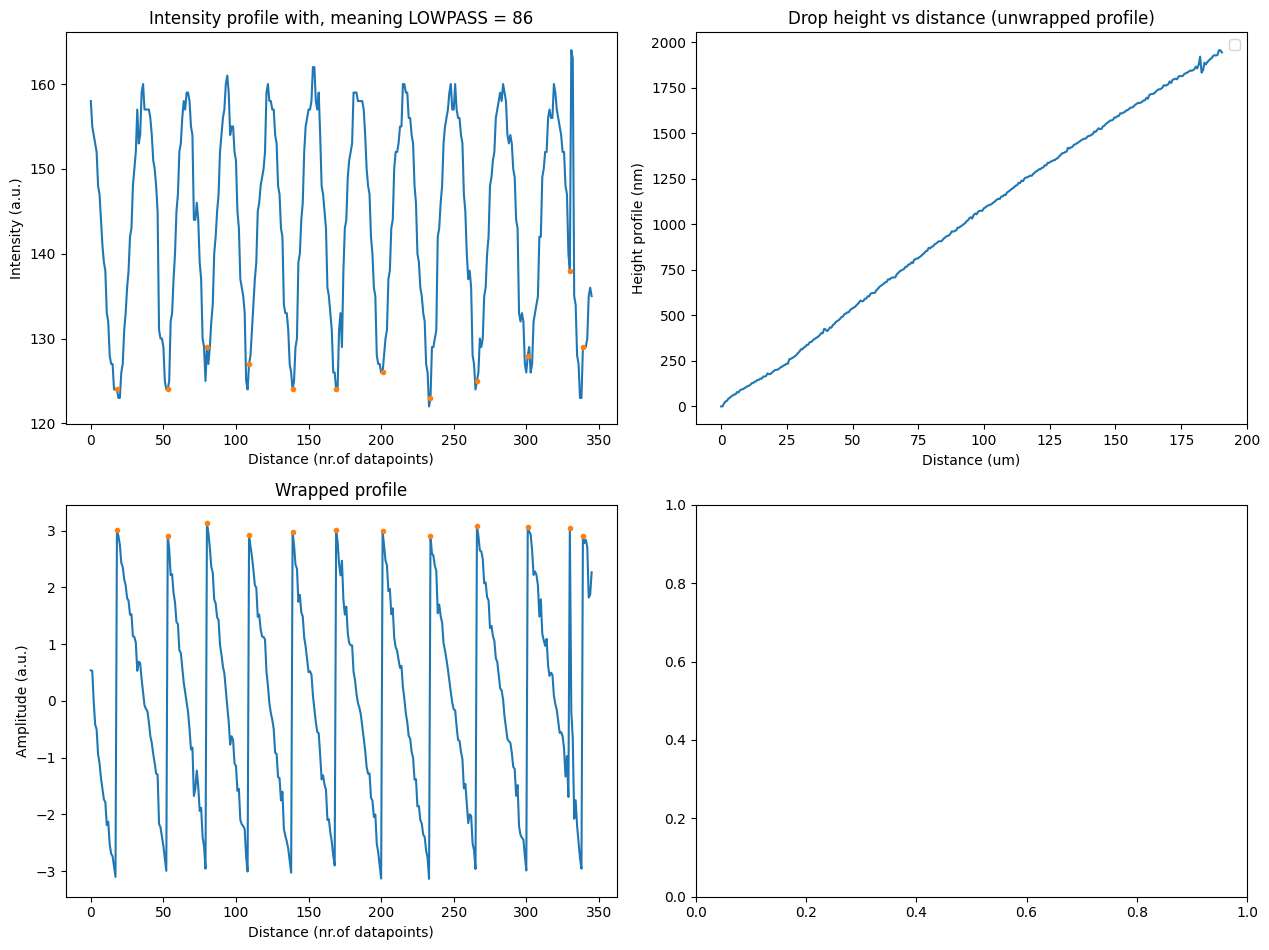

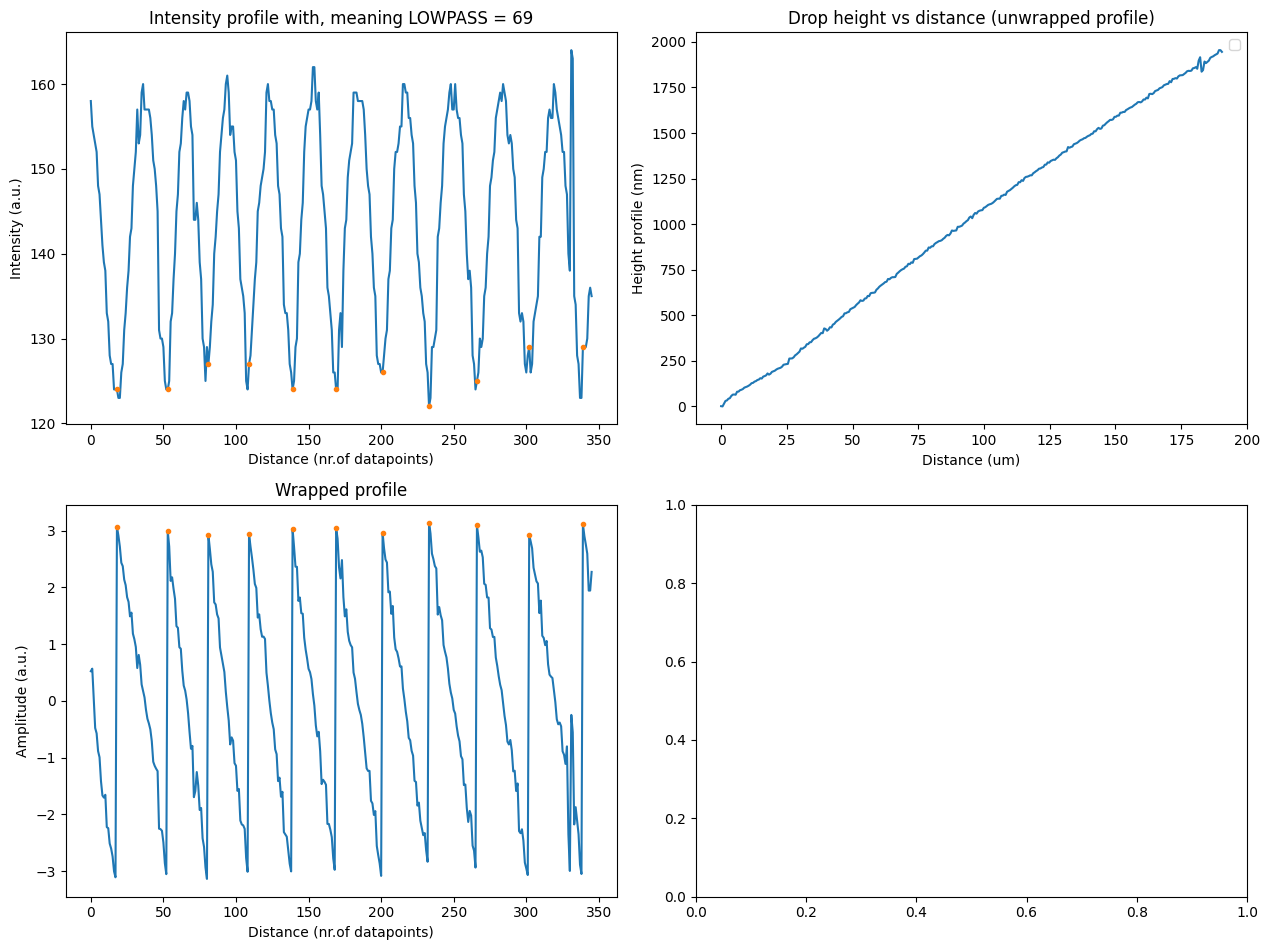

[2145.30891694 2134.88547649 1944.54667858 1945.25379981]
[0.595773849628055, 0.5957361978400323, 0.5766934041319595, 0.576708948919712]


In [1]:
"""
For testing/fixing wrapped profiles: ocassionally, even thought the wrapped profile looks like a nice sawtooth, extra mini 'peaks' are found in the  sawtooth itself (which probably messes with the unwrapping?)
Used function: 
"""
import pickle
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift, ifft, ifftshift
import scipy
from scipy import signal
from scipy.constants import pi
import warnings
import logging
import os
# import importlib  
# sklearn = importlib.import_module("scikit-learn")
from sklearn.metrics import r2_score
import math


def linearFitLinearRegimeOnly_wPointsOutsideDrop_v3(xarr, yarr, sensitivityR2, k, lenArrOutsideDrop):
    """
    Version 3 of 'linearFitLinearRegimeOnly()'
    Try fitting in linear regime of droplet shape for contact angle analysis.
    Fit in range from end backwards (iun case of artifacts there),
    and for beginning part: iterate backwards from +- 1/4 of droplet regime. Stop when deviating from desired R^2.
    :param xarr: array of distance in x-direction
    :param yarr: array of height
    :param sensitivityR2: desired minimum R^2 of fit to judge its validity
    :param k: nr of vector being analysed
    :param lenArrOutsideDrop: pixellength of vector pointing outside of drop for extra margin on CL position
    :return startLinRegimeIndex: index nr from which point forwards the linear regime is taken.
    :return coef1: calculated a & b values of linear fit
    :return r2: calculated R^2 of fit
    """
    #
    minimalnNrOfDatapointsi = round((len(yarr)-lenArrOutsideDrop) * (2 / 4))  #minim nr of datapoints over which should be fitted = half the array inside droplet

    residualLastTime = []  # some arbitrary high value to have the first iteration work

    rangeEndi = round(lenArrOutsideDrop/2) # start somewhere outside the CL, but not super far (So here, at half the length outside drop)
    rangeStarti = round((len(yarr)-lenArrOutsideDrop) / 7) + lenArrOutsideDrop #only try to fit up untill from the first 1/8th of datapoints inside the drop onwards #len(yarr) - minimalnNrOfDatapointsi

    rangeEndk = -round((len(yarr)-lenArrOutsideDrop) * (2 / 4)) # iterate till at most 2/4th back from the end of the array.
    CurrentFitGood = True
    GoodFitVector = False
    #Vary linear fit range of dataset. Always start by changing the 'first' index in array and fit till end of array.
    #However since sometimes, due to artifacts, the end of array gives poor height values, also allow to omit datapoints from there.
    stepj = round(minimalnNrOfDatapointsi/10)
    startLinRegimeIndex = 0

    sensitivityR2 = 0.997
    for j in range(-4, rangeEndk, -stepj): # omit last 5 datapoints (since these are generally not great due to wrapped function). Make steps of 10 lengths
        if not CurrentFitGood: #if fit is not good, break out of loop
            break
        if startLinRegimeIndex == rangeEndi+1:  #if we got here, that means over the entire range fit was very good. Stop trying to fit over smaller range and just parse this
            print(f"A good fit (R2 = {r2:.4f}) was found over the entire range at vector {k}. That might be suspicious..")
            CurrentFitGood = False
            GoodFitVector = True
            break
        for i in range(rangeStarti, rangeEndi, -1):  # iterate backwards from +- 1/8 of droplet regime. Stop when deviating from desired R^2.
            coef1, residuals, _, _, _ = np.polyfit(xarr[i:j], yarr[i:j], 1, full=True)
            startLinRegimeIndex = i
            r2 = r2_score(yarr[i:i+30], np.poly1d(coef1)(xarr[i:i+30]))           #r2 of 'first' 10 datapoints to
            #r2 = r2_score(yarr[i:j], np.poly1d(coef1)(xarr[i:j]))
            if r2 < sensitivityR2 and k != round(len(xarr) / 2):  # stop iterating when R2 deviates too much
                CurrentFitGood = False
                GoodFitVector = True
                break
            residualLastTime.append(residuals**0.5 / len(xarr[i:j]))
    if not GoodFitVector:
        print(f"No good linear fit was found inside the droplet. Skipping this vector {k}")
              #f"\nTherefore the data is fitted from 2/4th of the data onwards.")

    return startLinRegimeIndex+rangeStarti, coef1, r2, GoodFitVector

def intensityToHeightProfile(profile, lineLengthPixels, conversionXY, conversionZ, FLIPDATA, lowpassfactor):
    """
    Convert an intensity profile to a relative height profile by using monochromatic interferometry.
    Best applied when many interference fringes are visible. Not suitable for e.g. less than 5 fringes.
    Intensity profile with fringes is converted to a 'wrapped' or 'sawtooth' profile after filtering in fourier space.
    This allows us to distinguish full phases present in the intensity profile, which can then be converted
    to a smooth height profile by 'unwrapping' (stacking the phases).

    Lowpass & highpass values for filtering in frequency domain are important w/ respect to the obtain results.
    So far, I found generally 'lowpass = 1/2 profile length' & 'highpass = 2' work fine for CA fringes.

    :param profile: intensity profile on line
    :param lineLengthPixels: length of the line (pixels)
    :param conversionXY: conversion factor for pixels -> um in xy-plane
    :param conversionZ: conversion factor for pixels -> nm in z-plane
    :param FLIPDATA: boolean to reverse data in xy-plane (only for plotting purposes)
    :return unwrapped: calculated height profile (units = what was specified by conversionZ)
    :return x: calculated x-values on corresponding with the unwrapped height profile (distance. units = what was specified by conversionXY)
    :return wrapped: wrapped profile
    :return peaks: indices of calculated maxima
    """
    # transform to fourier space
    profile_fft = np.fft.fft(profile)
    mask = np.ones_like(profile).astype(float)
    lowpass = round(len(profile) / lowpassfactor);
    highpass = 2  # NOTE: lowpass seems most important for a good sawtooth profile. Filtering half of the data off seems fine
    mask[0:lowpass] = 0;
    mask[-highpass:] = 0
    profile_fft = profile_fft * mask
    profile_filtered = np.fft.ifft(profile_fft)

    # calculate the wrapped space
    wrapped = np.arctan2(profile_filtered.imag, profile_filtered.real)
    peaks, _ = scipy.signal.find_peaks(wrapped, height=2, prominence = 1, distance = 3)  # obtain indeces om maxima

    unwrapped = np.unwrap(wrapped)
    if FLIPDATA:
        unwrapped = -unwrapped + max(unwrapped)
    # TODO conversionZ generally in nm, so /1000 -> in um

    h_unwrapped = unwrapped[-1] * conversionZ       #nm 'final' height (right side) from unwrapped calculation
    # conversionZ * 2pi since conversionZ is divided by 1 phase = 2pi. So for 1 phase it's: wavelength / (2*refr_index) = height/phase
    # So nr of peaks * h/phase = height from peaks alone, which is a lower bound height
    h_peaks_lower = (len(peaks)-1) * (conversionZ * 2 * np.pi)
    h_peaks_upper = (len(peaks)+1) * (conversionZ * 2 * np.pi)  #upper bound, peaks+2 (since in principle on both sides it oculd be close to a maximum
    if h_unwrapped < h_peaks_lower or  h_unwrapped > h_peaks_upper:
        logging.critical(f"WATCH OUT: calculated height from unwrapping ({h_unwrapped:.2f}) is very different from calculated height straight from nr. of maximas (lower bound={h_peaks_lower:.2f}, upper bound = {h_peaks_upper:.2f})")
        exit()
    unwrapped *= conversionZ / 1000  # if unwapped is in um: TODO fix so this can be used for different kinds of Z-unit
    # x = np.arange(0, len(unwrapped)) * conversionXY * 1000 #TODO same ^
    # TODO conversionXY generally in mm, so *1000 -> unit in um.
    x = np.linspace(0, lineLengthPixels, len(unwrapped)) * conversionXY * 1000  # converts pixels to desired unit (prob. um)

    # fig1, ax1 = plt.subplots(2, 2)
    # ax1[0, 0].plot(profile);
    # ax1[0, 0].plot(peaks, np.array(profile)[peaks], '.')
    # ax1[1, 0].plot(wrapped);
    # ax1[1, 0].plot(peaks, wrapped[peaks], '.')
    # ax1[0, 0].set_title(f"Intensity profile with, meaning LOWPASS = {lowpass}");
    # ax1[1, 0].set_title("Wrapped profile")
    # ax1[0, 1].plot(x, unwrapped * 1000); # TODO unit unwrapped was in um, *1000 -> back in nm. unit x in um
    # ax1[0, 1].set_title("Drop height vs distance (unwrapped profile)")
    # ax1[0, 1].legend(loc='best')
    # ax1[0, 0].set_xlabel("Distance (nr.of datapoints)");
    # ax1[0, 0].set_ylabel("Intensity (a.u.)")
    # ax1[1, 0].set_xlabel("Distance (nr.of datapoints)");
    # ax1[1, 0].set_ylabel("Amplitude (a.u.)")
    # ax1[0, 1].set_xlabel("Distance (um)");
    # ax1[0, 1].set_ylabel("Height profile (nm)")
    # fig1.set_size_inches(12.8, 9.6)
    # fig1.tight_layout()
    # plt.show()

    return unwrapped, x, wrapped, peaks


path = 'C:\\Users\\ReuvekampSW\\Documents\\InterferometryPython\\tempIntensityProfileForWrappedFixing.pickle'
with open(path, 'rb') as new_filename:
     profile, lineLengthPixels, conversionXY, conversionZ, FLIPDATA = pickle.load(new_filename)     # x-distance, intensity

unwrappedArr = []
angleDegArr = []
for lowpassfactor in [2,3,4,5]:
    unwrapped, x,_,_ = intensityToHeightProfile(profile, lineLengthPixels, conversionXY, conversionZ, FLIPDATA, lowpassfactor)
    unwrappedArr.append(unwrapped[-1])
    startIndex, coef1, r2, GoodFit = linearFitLinearRegimeOnly_wPointsOutsideDrop_v3(x, unwrapped, 0.997, 0, 50)
    a_horizontal = 0
    angleRad = math.atan((coef1[0] - a_horizontal) / (1 + coef1[0] * a_horizontal))
    angleDeg = math.degrees(angleRad)
    if angleDeg > 45:  # Flip measured CA degree if higher than 45.
        angleDeg = 90 - angleDeg
    angleDegArr.append(angleDeg)
print(np.array(unwrappedArr) * 1000)
print(angleDegArr)

Breaking out of loop (0, 40, 110, 40, 90)
Breaking out of loop (1, 45, 115, 40, 90)
Breaking out of loop (2, 50, 120, 40, 90)
4 63.33333333333334
5 63.33333333333334
Best linear regime: Start index = 40, End index = 90, R² = 1.000
[  0.05487555 -16.75480875] True


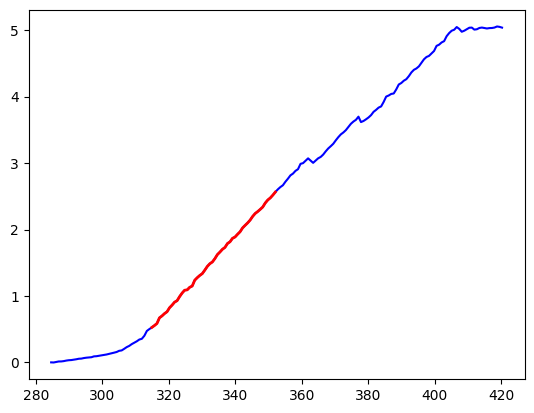

In [20]:
"""
For testing/fixing linear fit of height data -> contact angle. Specifically, the start & end- index of the data over which the linear fit should be applied
Used function: 
"""
import pickle
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift, ifft, ifftshift
import scipy
from scipy import signal
from scipy.constants import pi
import warnings
import logging
import os
# import importlib  
# sklearn = importlib.import_module("scikit-learn")
from sklearn.metrics import r2_score
import math
from sklearn.linear_model import LinearRegression

def linearFitLinearRegimeOnly_wPointsOutsideDrop_v5(x, y, sensitivityR2=0.99, lenOutside=0):
    """
    Version 5 of 'linearFitLinearRegimeOnly()'
    Finds the largest regime in the dataset that can be fitted with a good linear fit.

    Parameters:
    - x (array-like): Independent variable.
    - y (array-like): Dependent variable.
    - threshold (float): Minimum R² value to consider the fit as "good".

    Returns:
    - best_start (int): Starting index of the best linear regime.
    - best_end (int): Ending index of the best linear regime.
    - best_r2 (float): R² value of the best linear fit.
    """
    n = len(x)
    best_start, best_end, best_r2 = 0, 0, 0
    bestcoef1 = [0,0]
    end_final = []
    GoodFitVector = False
    omitted_finalIndices = 5
    iteration_step_start = 5
    iteration_step_end = 20
    if lenOutside > 10:
        startIndex = lenOutside - 10
    else:
        startIndex = 0
    #for start in range(startIndex, n - 1 - omitted_finalIndices, iteration_step_start):  # Iterate over possible start indices
    for i, start in enumerate(range(startIndex, startIndex + (n-lenOutside)//5, iteration_step_start)):  # Iterate over possible start indices: only some startindices near CL: bit outside untill len(inside)/5
        currentRangeGoodFit = False
        
        end_start = start + 50
        if i == 0 or not GoodFitVector:
            end_end = n - omitted_finalIndices
        else:
            end_start = max([start + 50, round(np.mean(end_final)) - iteration_step_end*3])
            end_end = round(np.mean(end_final)) + iteration_step_end*3
        if i>3 and GoodFitVector: #from the 4th starting index forward, check if end-index is changing a lot. If no, prob. won't change later = quit function
            end_final_diff = sum(abs(np.array(end_final[-3:])-np.mean(end_final[-3:])))
            
            if end_final_diff / 3 < iteration_step_end:
                print('stop', i, end_final_diff)
                break
            else:
                print(i, end_final_diff)
        end_range = np.arange(end_start, end_end, iteration_step_end)
        for end in end_range:  # Iterate over possible end indices (at least 30 points)
            # Subset data
            x_subset = x[start:end]
            y_subset = y[start:end]

            # Fit linear model
            if x_subset.size == 0:
                print('stoppin')
            coef1, residuals, _, _, _ = np.polyfit(x_subset, y_subset, 1, full=True)

            # Compute R² score
            y_pred = np.poly1d(coef1)(x_subset)
            r2 = r2_score(y_subset, y_pred)

            # Check if this regime is the best so far
            if (r2 >= sensitivityR2):
                currentRangeGoodFit = True
                if(end - start) > (best_end - best_start):
                    best_start, best_end, best_r2 = start, end, r2
                    bestcoef1 = coef1
                    GoodFitVector = True
            elif currentRangeGoodFit:   #if r2 score is bad, but in current startIndex range a good fit was already found, then the endIndex is messing up the fit = stop trying for higher order, which will likely just worsen the fit
                end_final.append(end)
                print(f"Breaking out of loop {i, start, end, best_start, best_end}")
                break
            if end == end_range[-1]:
                end_final.append(end)
            
    return best_start, bestcoef1, best_r2, GoodFitVector, best_end

path = 'C:\\Users\\ReuvekampSW\\Documents\\InterferometryPython\\tempForlInearFit2.pickle'
with open(path, 'rb') as new_filename:
     xarr, yarr, sensitivityR2, k, lenArrOutsideDrop = pickle.load(new_filename)     # x-distance, y-height, desired sensitivity, k=line nr, lenght of part outside chosen contour

startIndex, coef1, r2, GoodFit, endIndex = linearFitLinearRegimeOnly_wPointsOutsideDrop_v5(xarr, yarr, sensitivityR2 = 0.999, lenOutside=lenArrOutsideDrop)
print(f"Best linear regime: Start index = {startIndex}, End index = {endIndex}, R² = {r2:.3f}")
print(coef1, GoodFit)

plt.plot(xarr, yarr, 'b')
plt.plot(xarr[startIndex:endIndex], yarr[startIndex:endIndex], label="Best Linear Regime", color="red", lw=2)


In [1]:
# #Testing 2: sliding window instead of nested loops (for increased efficiency)
# 
# import numpy as np
# 
# def precompute_sums(x, y):
#     """Precomputes cumulative sums for x, y, x^2, and x*y."""
#     x_cumsum = np.cumsum(x)
#     y_cumsum = np.cumsum(y)
#     xx_cumsum = np.cumsum(x * x)
#     xy_cumsum = np.cumsum(x * y)
#     return x_cumsum, y_cumsum, xx_cumsum, xy_cumsum
# 
# def compute_linear_fit(start, end, x,y,x_cumsum, y_cumsum, xx_cumsum, xy_cumsum, N):
#     """Uses precomputed sums to compute the slope, intercept, and R² of a subset."""
#     n = end - start
#     x_sum = x_cumsum[end] - x_cumsum[start]
#     y_sum = y_cumsum[end] - y_cumsum[start]
#     xx_sum = xx_cumsum[end] - xx_cumsum[start]
#     xy_sum = xy_cumsum[end] - xy_cumsum[start]
# 
#     x_mean = x_sum / n
#     y_mean = y_sum / n
# 
#     # Variance and covariance
#     cov_xy = xy_sum / n - x_mean * y_mean
#     var_x = xx_sum / n - x_mean**2
# 
#     # Compute slope and intercept
#     slope = cov_xy / var_x
#     intercept = y_mean - slope * x_mean
# 
#     # Compute R²
#     residuals = (y[start:end] - (slope * x[start:end] + intercept)) ** 2
#     ss_res = np.sum(residuals)
#     ss_tot = np.sum((y[start:end] - y_mean) ** 2)
#     r2 = 1 - ss_res / ss_tot
#     return slope, intercept, r2
# 
# def find_largest_linear_regime_dp(x, y, threshold=0.99):
#     """Find the largest linear regime using precomputed sums."""
#     N = len(x)
#     x_cumsum, y_cumsum, xx_cumsum, xy_cumsum = precompute_sums(x, y)
# 
#     best_start, best_end, best_r2 = 0, 0, 0
# 
#     # Check all possible subsets
#     for start in range(N - 1):
#         for end in range(start + 2, N + 1):  # At least 2 points
#             _, _, r2 = compute_linear_fit(start, end,x,y, x_cumsum, y_cumsum, xx_cumsum, xy_cumsum, N)
#             if r2 >= threshold and (end - start) > (best_end - best_start):
#                 best_start, best_end, best_r2 = start, end, r2
# 
#     return best_start, best_end, best_r2
# 
# path = 'C:\\Users\\ReuvekampSW\\Documents\\InterferometryPython\\tempForlInearFit2.pickle'
# with open(path, 'rb') as new_filename:
#      xarr, yarr, sensitivityR2, k, lenArrOutsideDrop = pickle.load(new_filename)     # x-distance, y-height, desired sensitivity, k=line nr, lenght of part outside chosen contour
# 
# startIndex, endIndex, r2 = find_largest_linear_regime_dp(xarr, yarr, threshold=0.99)#, sensitivityR2 = 0.999)#, lenOutside=lenArrOutsideDrop)
# print(f"Best linear regime: Start index = {startIndex}, End index = {endIndex}, R² = {r2:.3f}")
# print(coef1, GoodFit)
# 
# plt.plot(xarr, yarr, 'b')
# plt.plot(xarr[startIndex:endIndex], yarr[startIndex:endIndex], label="Best Linear Regime", color="red", lw=2)

In [ ]:
a = 2
for k in [0,1,2,3,4]:
    try:
        b = 3
        if k != a:
            if 3 == 3:
                pass
        print(f'{k} we got here')




